## K optimization
This script generates the figure to show k optimization for the presentation. Optimal k is dependant on N and the dataset.

In [1]:
# Dependencies:
# pip: scikit-learn, anndata, scanpy
#
# Modified from the Python starter kit for the NeurIPS 2021 Single-Cell Competition.
#
# More documentation:
#
# https://viash.io/docs/creating_components/python/

In [2]:
import logging
import anndata as ad
import sys

from scipy.sparse import csc_matrix

from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression
import numpy as np

logging.basicConfig(level=logging.INFO)

Assigns starter kit example data files

In [3]:
## VIASH START
# Anything within this block will be removed by `viash` and will be
# replaced with the parameters as specified in your config.vsh.yaml.
meta = { 'resources_dir': '.' }

par = { 
    'input_train_mod1': 'sample_data/openproblems_bmmc_cite_starter/openproblems_bmmc_cite_starter.train_mod1.h5ad',
    'input_train_mod2': 'sample_data/openproblems_bmmc_cite_starter/openproblems_bmmc_cite_starter.train_mod2.h5ad',
    'input_test_mod1': 'sample_data/openproblems_bmmc_cite_starter/openproblems_bmmc_cite_starter.test_mod1.h5ad',
    'distance_method': 'minkowski',
    'output': 'output.h5ad',
    'n_pcs': 50,
}
## VIASH END
test_mod2_file = 'sample_data/openproblems_bmmc_cite_starter/openproblems_bmmc_cite_starter.test_mod2.h5ad '


In [4]:
logging.info('Reading `h5ad` files...')
input_train_mod1 = ad.read_h5ad(par['input_train_mod1'])
input_train_mod2 = ad.read_h5ad(par['input_train_mod2'])
input_test_mod1 = ad.read_h5ad(par['input_test_mod1'])

true_test_mod2 = ad.read_h5ad(test_mod2_file)

INFO:root:Reading `h5ad` files...


In [5]:

# TODO: implement own method
from beans import method


This function calculates rmse, root mean squared error, which is the metric used in the competition. Lower is better.

In [6]:
from sklearn.metrics import mean_squared_error
def calculate_rmse(true_test_mod2, pred_test_mod2):
    return  mean_squared_error(true_test_mod2.X.toarray(), pred_test_mod2.X.toarray(), squared=False)

For a variety of values for k, make predictions and calculate the rmse.

In [7]:
#forward
tests_f={}
for i in range (1, 50):
    pred_data = method(input_train_mod1, input_train_mod2, input_test_mod1, k=i, d=50)
    tests_f[i]=calculate_rmse(true_test_mod2, pred_data)

INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimension

INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...
INFO:root:Performing dimensionality reduction on modality 1 values...
INFO:root:Performing dimensionality reduction on modality 2 values...
INFO:root:Running K nearest neigbors...


#go backwards
tests={}
for i in range (2, 200, 10):
    pred_data = method(input_train_mod2, input_train_mod1, true_test_mod2, k=i)
    tests[i]=calculate_rmse(input_test_mod1, pred_data)
tests

Now plot them to see that it goes up if you're too low or too high.

In [8]:
from matplotlib import pyplot as plt

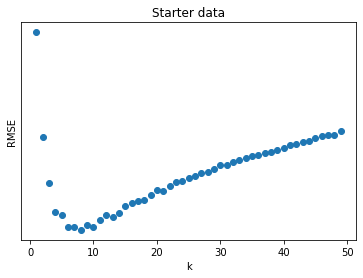

In [9]:
fig, ax = plt.subplots()

ax.tick_params(left = False, labelleft = False) 

plt.scatter(tests_f.keys(), tests_f.values())
plt.ylabel("RMSE")
plt.xlabel("k")
plt.title("Starter data")
plt.savefig("K_opt.png",dpi=300)
plt.show()

My heuristic was sqrt of N, which seemed better when I tried it earlier? But is not so great now and IDK :/

In [10]:
from statistics import sqrt
from math import ceil
N = input_train_mod1.shape[0]
k = ceil(sqrt(N))
k

18